In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.192733040532804 et b_1=5.229487004160418


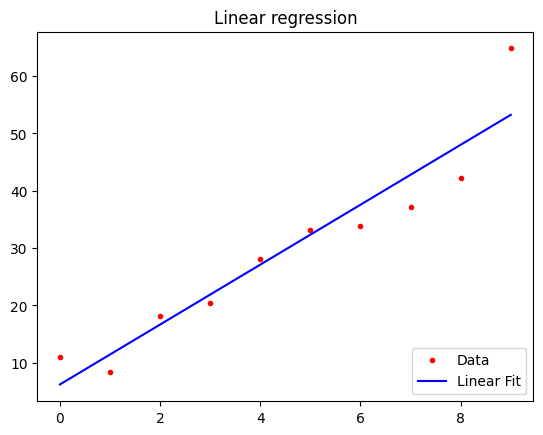

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [11]:
n_samples = 10
(x1, y1) = generate_data(n_samples, outlier = True)
(x2, y2) = generate_data(n_samples, outlier = True)
(x3, y3) = generate_data(n_samples, outlier = True)
(x4, y4) = generate_data(n_samples, outlier = True)
(x5, y5) = generate_data(n_samples, outlier = True)

jdd = [[x1,y1], [x2,y2], [x3,y3], [x4,y4], [x5,y5]]

for i in range(len(jdd)):
    x = jdd[i][0] 
    y = jdd[i][1] 

    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    b1 = lr.intercept_
    b0 = lr.coef_[0]
    s_2 = s2(y, lr.predict(x[:, np.newaxis]))

    print("pour i = ", i , ", b0 = ", b0, ", b1 = ", b1, ", s2 = ", s_2)




pour i =  0 , b0 =  5.39786203732425 , b1 =  5.005277372423389 , s2 =  34.09099909353992
pour i =  1 , b0 =  5.319513165401818 , b1 =  5.533192599497621 , s2 =  33.78070922999757
pour i =  2 , b0 =  5.671553114258524 , b1 =  4.731476151661397 , s2 =  28.58456647472698
pour i =  3 , b0 =  4.729864411698344 , b1 =  9.69419120936356 , s2 =  45.42600957424342
pour i =  4 , b0 =  4.9051139797899 , b1 =  7.224402955569985 , s2 =  36.569606765047666


In [12]:
print("Outlier = False")

n_samples = 10
(x1, y1) = generate_data(n_samples, outlier = False)
(x2, y2) = generate_data(n_samples, outlier = False)
(x3, y3) = generate_data(n_samples, outlier = False)
(x4, y4) = generate_data(n_samples, outlier = False)
(x5, y5) = generate_data(n_samples, outlier = False)

jdd = [[x1,y1], [x2,y2], [x3,y3], [x4,y4], [x5,y5]]

for i in range(len(jdd)):
    x = jdd[i][0] 
    y = jdd[i][1] 

    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    b1 = lr.intercept_
    b0 = lr.coef_[0]
    s_2 = s2(y, lr.predict(x[:, np.newaxis]))

    print("pour i = ", i , ", b0 = ", b0, ", b1 = ", b1)



Outlier = False
pour i =  0 , b0 =  3.725939368615394 , b1 =  11.381303196960872
pour i =  1 , b0 =  3.422120396378038 , b1 =  13.088447754287586
pour i =  2 , b0 =  4.128876302729106 , b1 =  10.478134667897287
pour i =  3 , b0 =  4.251060676101391 , b1 =  8.537124575347697
pour i =  4 , b0 =  4.697291037845604 , b1 =  7.046529603453376


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [13]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [ ]:
def profil_residuel(x, y, i):
    
    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)

    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    y_pred_del_i = lr.predict(x[:, np.newaxis])

    e_i = y - y_pred_del_i
    
    return e_i

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [24]:
k = 9

n_samples = 10
(x1, y1) = generate_data(n_samples, outlier = True)
(x2, y2) = generate_data(n_samples, outlier = True)
(x3, y3) = generate_data(n_samples, outlier = True)
(x4, y4) = generate_data(n_samples, outlier = True)
(x5, y5) = generate_data(n_samples, outlier = True)

jdd = [[x1,y1], [x2,y2], [x3,y3], [x4,y4], [x5,y5]]


for i in range(len(jdd)):
    x = jdd[i][0] 
    y = jdd[i][1] 

    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    e_k = profil_residuel(x,y,k)

    print("pour i = ", i ,"et k = ", k , ", e_k = ", e_k)

pour i =  0 et k =  9 , e_k =  [ 2.06211117 -4.4829274  -0.31915274  1.71360638  3.0553314   0.1019779
 -2.23697937  0.17718636 -0.07115371 15.40578948]
pour i =  1 et k =  9 , e_k =  [ 0.55694346 -2.3204438   3.36438074 -0.431503    2.04640512 -2.53793762
 -1.43565604 -3.9417061   4.69951723 19.84910211]
pour i =  2 et k =  9 , e_k =  [-3.42146374 -1.01649775  6.77488529 -0.03756468 -0.30209415  1.29247866
 -5.57569564  2.50803769 -0.22208568 20.08430982]
pour i =  3 et k =  9 , e_k =  [-0.25751771  3.35696294  1.29157608 -4.25770946 -6.08964266  2.55920842
  2.3693385   4.04276027 -3.01497639 19.0966445 ]
pour i =  4 et k =  9 , e_k =  [ 1.85662051  4.48737308 -4.29558094 -4.66484979 -1.1652655   2.01416875
 -0.68794807  2.82761086 -0.3721289  18.40275797]


#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [31]:
def H(x):

    n = len(x)
    x_mean = [np.men(x) for i in range(n)]

    H = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            H[i][j] = 1/n + (x[i] - np.mean(x))*(x[j] - np.mean(x))/np.sum((x-x_mean)**2)


    return H


def cook(x, y, i):


    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)

    lr_del_i = LinearRegression()
    lr_del_i.fit(x_del_i[:, np.newaxis], y_del_i)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    y_pred_del_i = lr_del_i.predict(x[:, np.newaxis])

    lr = LinearRegression()
    lr.fit(x[:,np.newaxis], y)
    y_pred = lr.predict(x[:,np.newaxis])


    return np.sum((y_pred_del_i - y_pred)**2) / (2*s2(y, y_pred))




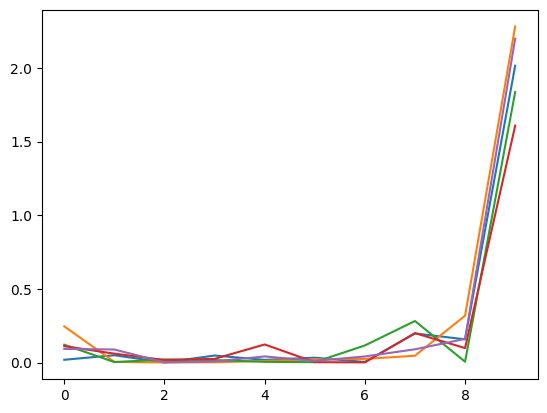

In [53]:
n_samples = 10
(x1, y1) = generate_data(n_samples, outlier = True)
(x2, y2) = generate_data(n_samples, outlier = True)
(x3, y3) = generate_data(n_samples, outlier = True)
(x4, y4) = generate_data(n_samples, outlier = True)
(x5, y5) = generate_data(n_samples, outlier = True)

jdd = [[x1,y1], [x2,y2], [x3,y3], [x4,y4], [x5,y5]]

for x in jdd:
    y_cook = [cook(x[0],x[1],i) for i in range(10)]


    abs = np.arange(10)
    plt.plot(abs, y_cook)

plt.show()

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...